In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [2]:
input_path = "../../data/raw/downtime.csv"
downtime_df = pd.read_csv(input_path)

print(f"Downtime Dataframe: {downtime_df.shape}")

Downtime Dataframe: (218, 14)


In [3]:
print("Cause Category Counts:")
print(downtime_df["Cause Category"].value_counts())

print(f"\nTotal Unique Cause Categories: {downtime_df['Cause Category'].nunique()}")


Cause Category Counts:
Cause Category
Startup            60
Shutdown           56
TFE                51
Sanitation         33
Extract Vat         8
Changeover          3
Personnel           2
FFTE                2
Emergency           1
Break               1
MBUX Separators     1
Name: count, dtype: int64

Total Unique Cause Categories: 11


In [4]:
downtime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Production Date  218 non-null    object 
 1   Dept             218 non-null    int64  
 2   Line             218 non-null    int64  
 3   Sub Line         218 non-null    int64  
 4   Time             218 non-null    object 
 5   Shift            218 non-null    object 
 6   Waterfall        218 non-null    object 
 7   From Product     218 non-null    int64  
 8   To Product       3 non-null      float64
 9   Cause Category   218 non-null    object 
 10  Cause            218 non-null    object 
 11  Total Time Mins  218 non-null    int64  
 12  Freq             218 non-null    int64  
 13  Comments         114 non-null    object 
dtypes: float64(1), int64(6), object(7)
memory usage: 24.0+ KB


In [5]:
downtime_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Dept,218.0,2.000000e+00,0.000000,2.0,2.0,2.0,2.0,2.0
Line,218.0,6.000000e+00,0.000000,6.0,6.0,6.0,6.0,6.0
Sub Line,218.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0
From Product,218.0,1.400339e+06,0.886977,1400338.0,1400338.0,1400339.0,1400340.0,1400340.0
To Product,3.0,1.400339e+06,0.577350,1400338.0,1400338.5,1400339.0,1400339.0,1400339.0
Total Time Mins,218.0,5.997248e+01,46.554949,10.0,28.0,55.0,78.5,375.0
Freq,218.0,1.032110e+00,0.242636,1.0,1.0,1.0,1.0,4.0


In [6]:
downtime_df.head(10)

,Production Date,Dept,Line,Sub Line,Time,Shift,Waterfall,From Product,To Product,Cause Category,Cause,Total Time Mins,Freq,Comments
0,4/05/2020,2,6,0,13:30,Daytime,Operational Losses,1400338,NaN,TFE,Low Solids,30,1,Seal Water
1,4/05/2020,2,6,0,15:25,Afternoon,Operational Losses,1400338,NaN,TFE,Low Solids,10,2,Seal Water Fault
2,4/05/2020,2,6,0,15:45,Afternoon,Operational Losses,1400338,NaN,TFE,Low Solids,10,1,Seal Water Fault
3,4/05/2020,2,6,0,18:00,Afternoon,Operational Losses,1400338,NaN,TFE,Low Solids,10,1,Seal Water Fault
4,4/05/2020,2,6,0,20:10,Afternoon,Operational Losses,1400338,NaN,TFE,Low Solids,15,1,Seal Water Fault
5,4/05/2020,2,6,0,21:00,Afternoon,Start & Finish production,1400338,NaN,Shutdown,Daily Shutdown,60,1,NaN
6,4/05/2020,2,6,0,22:00,Night,Sanitation,1400338,NaN,Sanitation,Machine Sanitation C I P,120,1,Full Cip Wash Ffte And Tfe
7,5/05/2020,2,6,0,0:00,Night,Operational Losses,1400339,NaN,TFE,Thin Film Evaporation,40,4,Seal Water Fault Occurred After Cip And The Pr...
8,5/05/2020,2,6,0,0:40,Night,Change Over,1400338,1400339.0,Changeover,Changeover Product,20,1,NaN
9,5/05/2020,2,6,0,1:00,Night,Start & Finish production,1400339,NaN,Startup,Daily Startup,90,1,Building Up Solids


In [7]:
downtime_df.sort_values(by="Production Date")

,Production Date,Dept,Line,Sub Line,Time,Shift,Waterfall,From Product,To Product,Cause Category,Cause,Total Time Mins,Freq,Comments
112,1/06/2020,2,6,0,4:15,Night,Start & Finish production,1400338,NaN,Startup,Weekly Startup,105,1,NaN
113,1/06/2020,2,6,0,6:00,Daytime,Start & Finish production,1400338,NaN,Startup,Daily Startup,15,1,NaN
114,1/06/2020,2,6,0,9:30,Daytime,Operational Losses,1400338,NaN,TFE,Low Solids,25,1,NaN
216,1/07/2020,2,6,0,6:45,Daytime,Start & Finish production,1400338,NaN,Startup,Daily Startup,75,1,NaN
215,1/07/2020,2,6,0,6:00,Daytime,Sanitation,1400340,NaN,Sanitation,Machine Sanitation C I P,45,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,8/05/2020,2,6,0,12:43,Daytime,Start & Finish production,1400338,NaN,Startup,Daily Startup,77,1,A/s To Fill Drums
34,8/05/2020,2,6,0,21:33,Afternoon,Start & Finish production,1400338,NaN,Shutdown,Weekly Shutdown,27,1,Weekend Shut Down.
35,8/05/2020,2,6,0,22:00,Night,Start & Finish production,1400338,NaN,Shutdown,Weekly Shutdown,40,1,NaN
36,8/05/2020,2,6,0,22:40,Night,Sanitation,1400338,NaN,Sanitation,Machine Sanitation C I P,100,1,NaN


In [8]:
downtime_df["Production Date"] = pd.to_datetime(downtime_df["Production Date"], dayfirst=True)
downtime_df["Timestamp"] = pd.to_datetime(downtime_df["Production Date"].astype(str) + ' ' + downtime_df["Time"])

print(downtime_df["Timestamp"])

0     2020-05-04 13:30:00
1     2020-05-04 15:25:00
2     2020-05-04 15:45:00
3     2020-05-04 18:00:00
4     2020-05-04 20:10:00
              ...        
213   2020-07-01 03:35:00
214   2020-07-01 04:22:00
215   2020-07-01 06:00:00
216   2020-07-01 06:45:00
217   2020-07-02 04:10:00
Name: Timestamp, Length: 218, dtype: datetime64[ns]


<Figure size 1500x500 with 0 Axes>

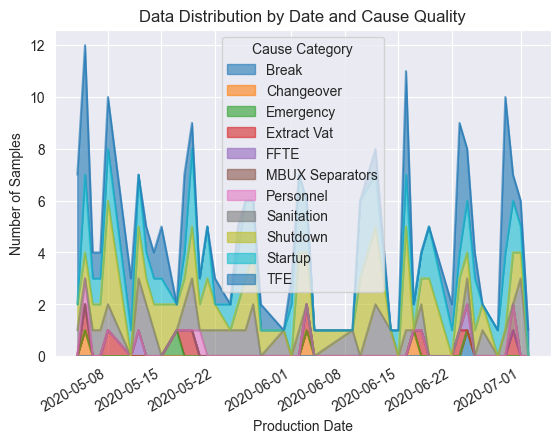

In [9]:
plt.figure(figsize=(15, 5))
downtime_df.groupby(['Production Date', 'Cause Category']).size().unstack().plot(kind='area', alpha=0.6)
plt.title('Data Distribution by Date and Cause Quality')
plt.ylabel('Number of Samples')
plt.show()

<Figure size 1500x600 with 0 Axes>

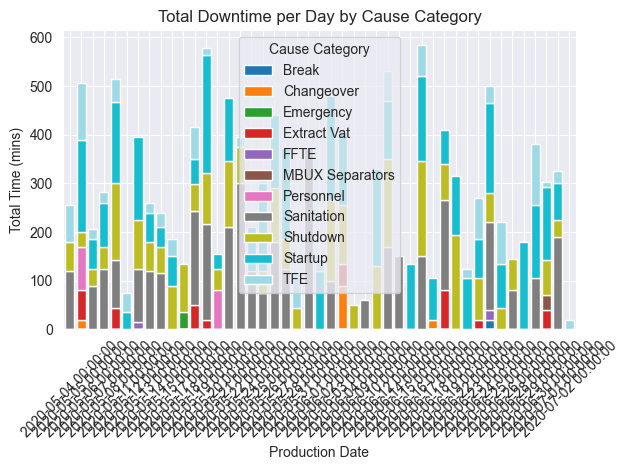

In [10]:
plt.figure(figsize=(15, 6))
downtime_df.groupby(['Production Date', 'Cause Category'])['Total Time Mins'].sum().unstack().plot(
    kind='bar', stacked=True, colormap='tab20', width=0.8
)
plt.title('Total Downtime per Day by Cause Category')
plt.ylabel('Total Time (mins)')
plt.xlabel('Production Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


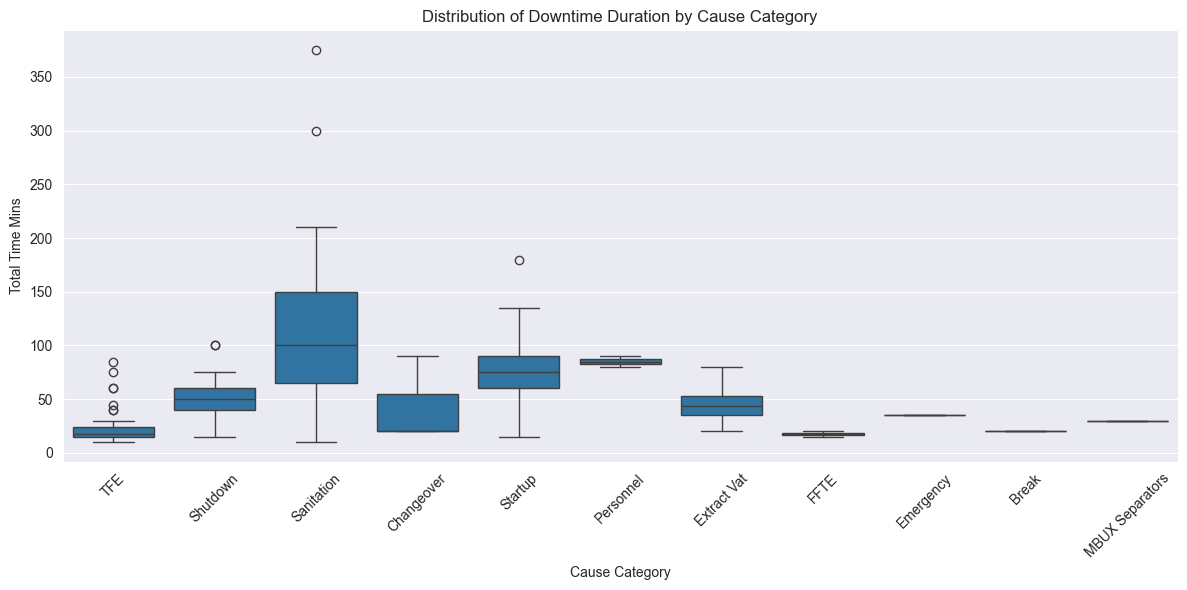

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=downtime_df, x='Cause Category', y='Total Time Mins')
plt.title('Distribution of Downtime Duration by Cause Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


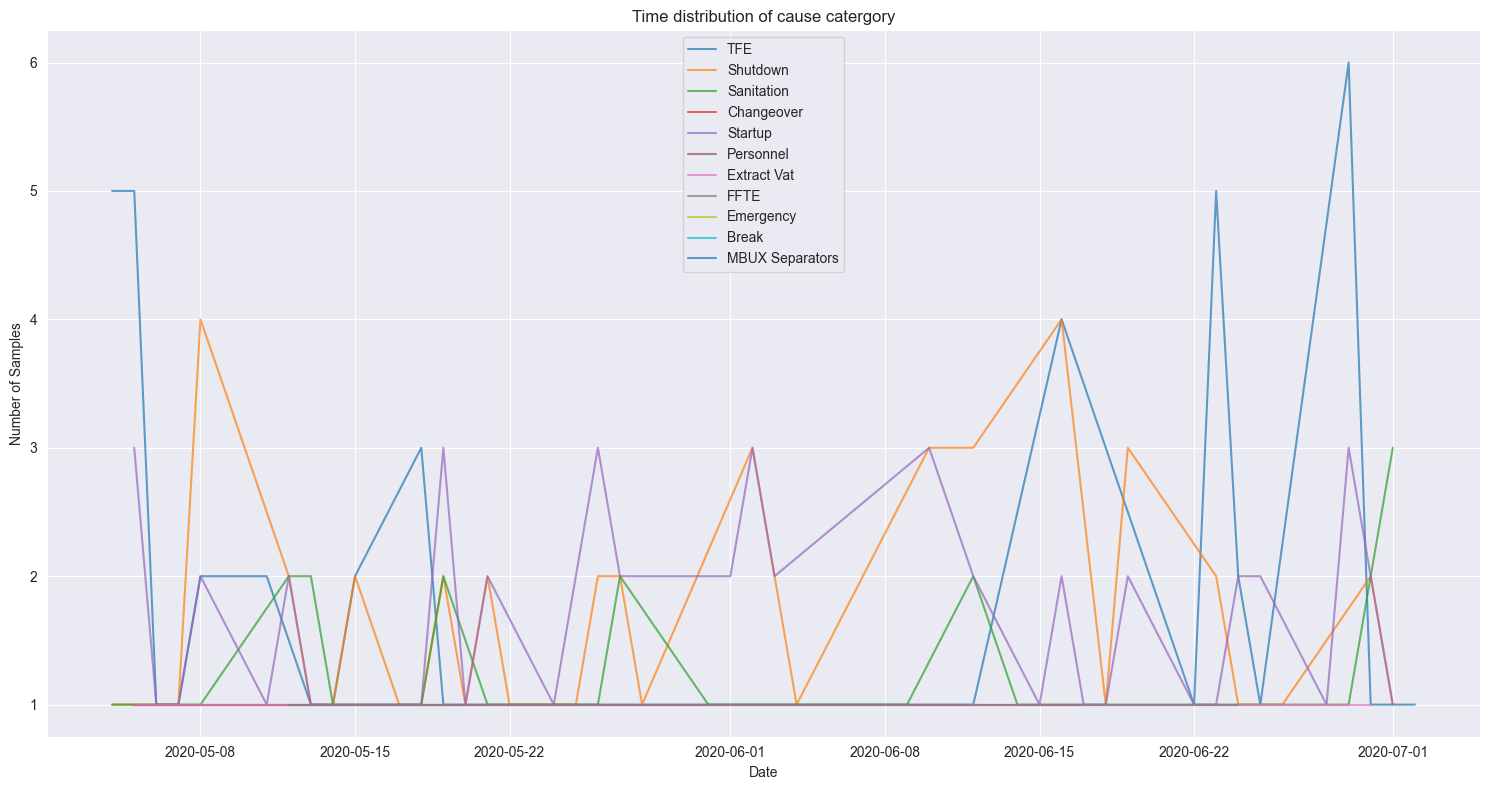

In [12]:
# Check the time distribution of each glaze type
plt.figure(figsize=(15, 8))
for cause in downtime_df['Cause Category'].unique():
    subset = downtime_df[downtime_df['Cause Category'] == cause]
    plt.plot(subset.groupby('Production Date').size().index, 
             subset.groupby('Production Date').size().values,
             label=cause, alpha=0.7)
plt.title('Time distribution of cause catergory')
plt.xlabel('Date')
plt.ylabel('Number of Samples')
plt.legend()
plt.tight_layout()
plt.show()

In [13]:
downtime_df.drop(columns=["To Product", "Comments"], inplace=True)

In [14]:
downtime_df["Timestamp"] = pd.to_datetime(
    downtime_df["Production Date"].astype(str) + " " + downtime_df["Time"].astype(str),
    errors="coerce"
)

downtime_df.drop(columns=["Production Date", "Time"], inplace=True)
downtime_df["label"] = (downtime_df["Total Time Mins"] > 10).astype(int)

In [15]:
categorical_cols = ["Shift", "Waterfall", "Cause Category", "Cause"]
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    downtime_df[col] = le.fit_transform(downtime_df[col])
    label_encoders[col] = le  

cols = ["Timestamp"] + [col for col in downtime_df.columns if col != "Timestamp"]
df = downtime_df[cols]

In [17]:
output_path = "../../data/processed/downtime_features.csv"
downtime_df.to_csv(output_path, index=False)